# Data Description

**age:** Age of primary beneficiary

**sex:** Insurance contractor gender, female / male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg /   ) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoker / Non - smoker

**region:** The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis

Let's start to explore with shape of data.

In [3]:
print(f'Shape of the data : {df.shape}')

Shape of the data : (1338, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Observation : 

* 'age','bmi','children' and 'charge' are numerical features.
* Children is categorical feature that appears numerical. 
* 'sex', 'smoker' and 'region' are categorical features.

In [5]:
# Basic descriptive statistic of the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [158]:
# Checking # of Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [159]:
# Checking number of duplicated values
df.duplicated().sum()

1

In [160]:
# Investigating duplicated record
df.loc[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [161]:
df[(df['bmi']==30.59) & (df['charges']==1639.5631)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


It appears that record 195 and record 581 are duplicated.  

## Univariate Analysis

### Exploring and Visualizing Categorical Features

* Sex
* Children
* Smoker
* Region

In [6]:
def add_percentage_to_bar_plot(df,feature,plot,hue = None):
    if hue == None:
        total = len(df[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.15
            y = p.get_y() + p.get_height()+3
            ax.annotate(percentage, (x, y), size = 12)
        plt.show()
        
    else:        
        number_of_categories = len([x for x in df[feature].unique() if x==x])
        number_of_hue_categories =  len([x for x in df[hue].unique() if x==x])
        
        a = [p.get_height() for p in plot.patches]
        patch = [p for p in plot.patches]
        for i in range(number_of_categories):
            total = df[feature].value_counts().values[i]
            for j in range(number_of_hue_categories):
                percentage = '{:.1f}%'.format(100 * a[(j*number_of_categories + i)]/total)
                x = patch[(j*number_of_categories + i)].get_x() + patch[(j*number_of_categories + i)].get_width() / 2 - 0.20
                y = patch[(j*number_of_categories + i)].get_y() + patch[(j*number_of_categories + i)].get_height() + 3
                ax.annotate(percentage, (x, y), size = 12)
                %debug
        plt.show()

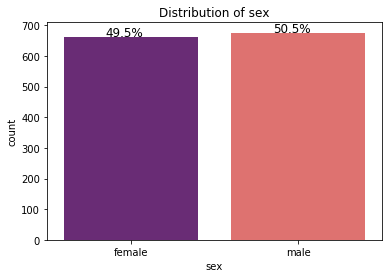

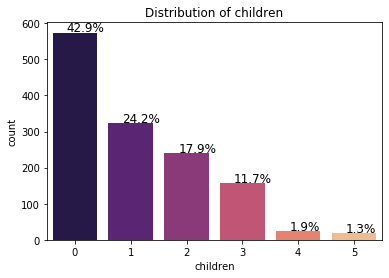

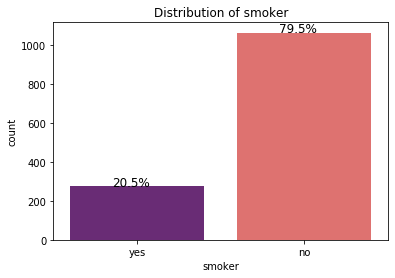

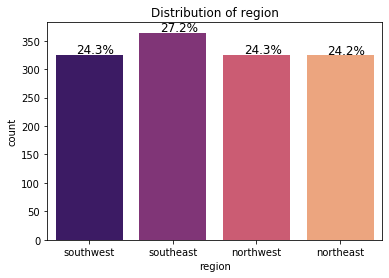

In [7]:
cat_features = ['sex','children','smoker','region']
for feature in cat_features:
    plt.title('Distribution of {}'.format(feature))
    ax = sns.countplot(data=df,x =feature ,palette='magma')
    add_percentage_to_bar_plot(df,feature,ax)
 

**Observations:** 

* Gender(sex) seems to be distributed almost equally.

* Number of children appears to be reasonably spread.

* Majority of the population are non-smokers (~%80).

* There is an almost equal distribution between regions.However, the highest rate (%27.2) belongs to the 'southest' region.

### Exploring and Visualizing Numeric Features

* age
* bmi
* charges

Let's check the basic summary statistics first, then continue to visualize these statistics and data distributions.

In [8]:
num_features = ['age','bmi','charges']

In [9]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


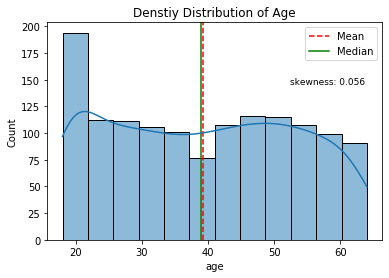

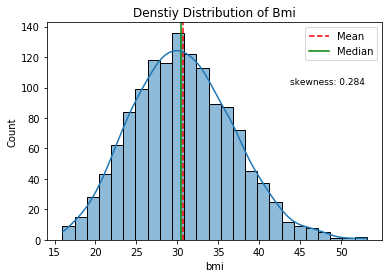

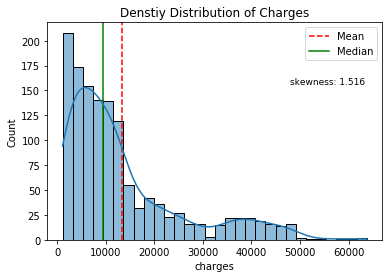

In [10]:
for feature in num_features:
    mean=df[feature].mean()
    median=df[feature].median()
    
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median, color='g', linestyle='-')
    plt.legend({'Mean':mean,'Median':median})
    
    plt.title('Denstiy Distribution of {}'.format(feature.capitalize()))
    
    ax = sns.histplot(df[feature],kde=True)
    
    ax.text(0.95, 0.75,'skewness: {}' .format(str(round(df[feature].skew(),3))),
            transform = ax.transAxes, 
            ha="right", 
            va="top",  
            size=9)
    plt.show()

**Observations**

* Bmi feature appears to normally distributed. (non-skewed & mesokurtic )
* Medical charges appear to skew to the right. And the mean of charges is greater than its median. 
* The Age of the insured approximately follows a uniform distribution. 

Let's visualize the outliers for numeric values by using boxplot.

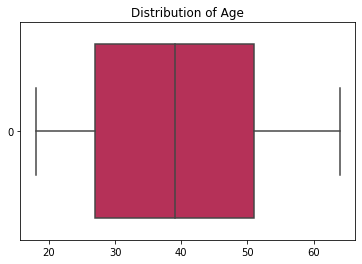

  Total number of outlier in age distirbutions : 0


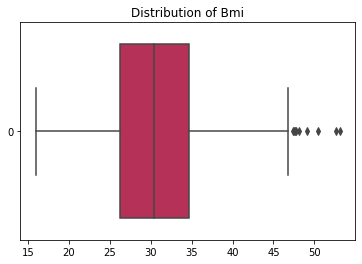

  Total number of outlier in bmi distirbutions : 9


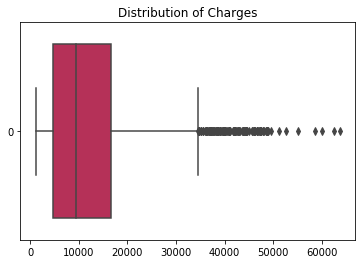

  Total number of outlier in charges distirbutions : 139


In [14]:
for feature in num_features:
    plt.title('Distribution of {}'.format(feature.capitalize()))
    ax = sns.boxplot(data=df[feature],palette='rocket',orient='h')
    plt.show()
    
    #calculating number of outliers.
    Q1 =df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    total_number_of_outlier = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    print('  Total number of outlier in {} distirbutions : {}'.format(feature,total_number_of_outlier))

**Observations**

* The average age of claimants is ~39, and the claimants are between the ages of 18 and 64 (all of them are adults).

* There are a total of 9 outlier values in the BMI distribution, all in the higher side.

* Out of a total of 1338 data points, there are a total of 139 outlier values in the distribution of charges, all in the higher side.
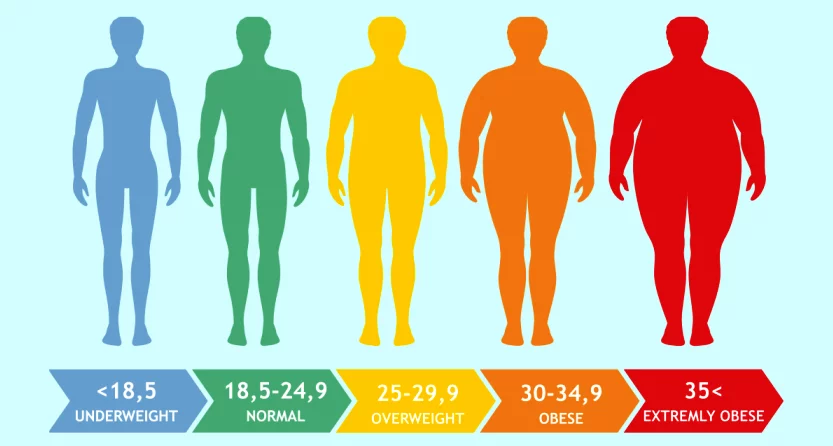

## Bivariate Analysis

In [26]:
df.groupby(['smoker', 'sex']).agg('count')

age  bmi  children  region  charges
smoker sex                                        
no     female  547  547       547     547      547
       male    517  517       517     517      517
yes    female  115  115       115     115      115
       male    159  159       159     159      159

In [177]:
df.groupby(['smoker', 'sex']).agg('mean')['charges']

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

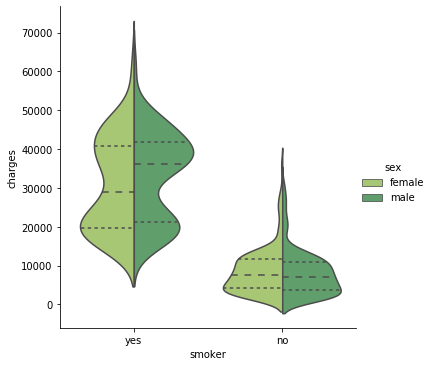

In [202]:
sns.catplot(x="smoker", y="charges", hue="sex",
            kind="violin", inner="quartiles", split=True,
            palette="summer_r", data=df);

**Observation:**

Average charges for man-smoker is higher then female-smoker and all the non-smoker.

Text(0.5, 1, 'BMI Distribution by Sex')

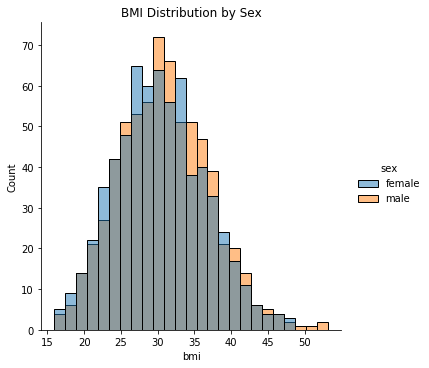

In [186]:
sns.displot(data=df,x='bmi',hue='sex')
plt.title('BMI Distribution by Sex')

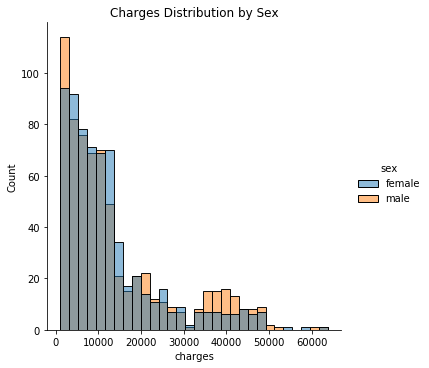

In [192]:
sns.displot(data=df,x='charges',hue='sex')
plt.title('Charges Distribution by Sex')
plt.show()

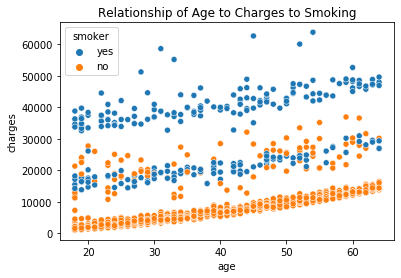

In [195]:
sns.scatterplot(data=df, x = 'age', y = 'charges', hue='smoker')
plt.title('Relationship of Age to Charges to Smoking')
plt.show()

**Observation:**
    
* Medical charges increase by age.
* Smoker medical charges are higher than non-smoker medical chages.

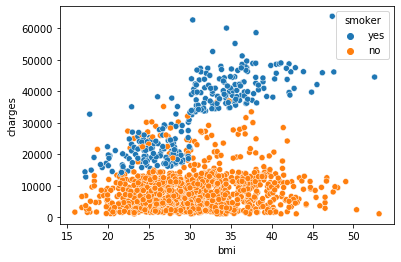

In [183]:
sns.scatterplot(data=df, y = 'charges', x = 'bmi', hue='smoker')

**Observations:**
*  Smoking and Obesity are directly proportional to the dollar amount of medical insurance claims 

## Multivariate Analysis

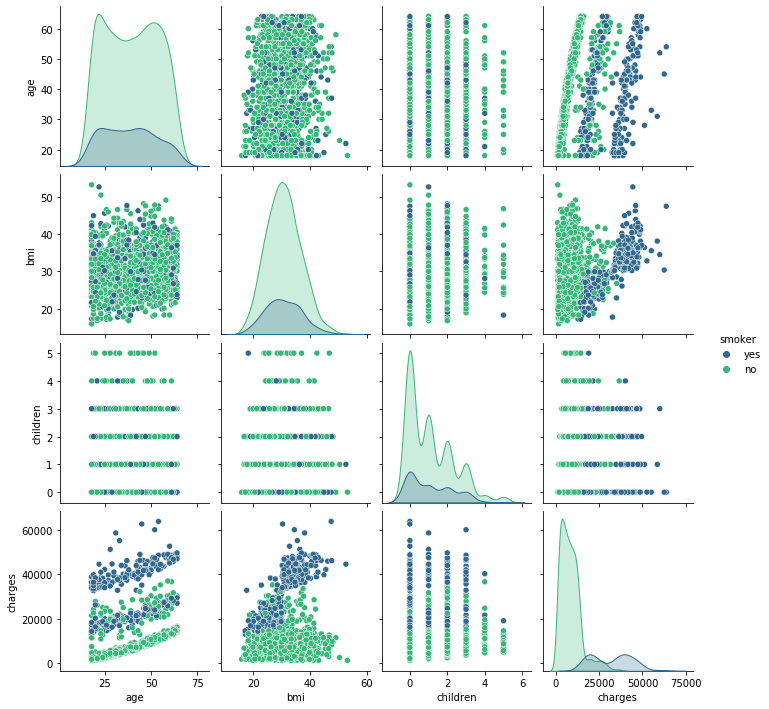

In [207]:
sns.pairplot(df, palette='viridis',hue='smoker')

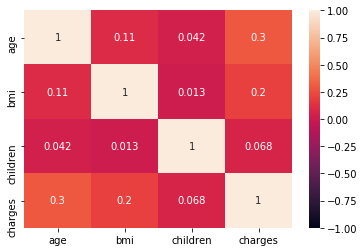

In [209]:
sns.heatmap(df.corr(),vmin=-1, vmax=1,annot=True)

**Obervations:**
* Age and BMI are comparatively more closely related to charges

# Feature Engineering 

In [52]:
bmi_bins = [15,18.5,25,30,35,60]
bmi_labels = ['underweight','normal','overweight','obese','extremly obese']

In [53]:
df['bmi_bins'] =pd.cut(df['bmi'],bins=bmi_bins,labels=bmi_labels)
df['age_bins'] =pd.qcut(df['age'],q=[0, .33, .66, 1.],labels=['young adult','middle adult','old adult'])

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_bins,age_bins
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,young adult
1,18,male,33.770,1,no,southeast,1725.55230,obese,young adult
2,28,male,33.000,3,no,southeast,4449.46200,obese,young adult
3,33,male,22.705,0,no,northwest,21984.47061,normal,middle adult
4,32,male,28.880,0,no,northwest,3866.85520,overweight,middle adult


In [ ]:
# Are medical claims made by smokers greater than those who don't smoke ?
# Is the BMI of females different than the BMI of males?
# Is the distribution of bmi across women with no children, one child and two children, the same?